# Chapter 2. Numpy - OpenCV

In [1]:
import cv2

# 1. Image Load

## Color Image

In [2]:
img = cv2.imread('./hmson.jpg', cv2.IMREAD_COLOR)
img.shape

(1496, 2047, 3)

In [3]:
height, width, channel = img.shape
height, width, channel

(1496, 2047, 3)

In [4]:
# 윈도우 창으로 그림 출력
def show_window(image_data) :
    cv2.imshow("Sonny", image_data)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [5]:
show_window(img)

## Gray Image

In [6]:
img_gray = cv2.imread('./hmson.jpg', cv2.IMREAD_GRAYSCALE)
show_window(img_gray)

## Half Image

In [7]:
img_gray2 = cv2.imread('./hmson.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_2)
show_window(img_gray2)

## Flip Image

In [8]:
img_filped = cv2.flip(img, 0)
show_window(img_filped)

## Rotation Image

In [9]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
img_rotated = cv2.warpAffine(img, rotation_matrix, (width, height), borderMode = cv2.BORDER_REPLICATE)
show_window(img_rotated)

# 2. Image Control

## Argumentation(Rotation)

In [10]:
import os

In [11]:
current_directory = os.getcwd() # 현재 디렉토리를 알아내는 함수
current_directory

'D:\\창원 제조 AI 아카데미\\2_복습\\02_Numpy'

In [12]:
# 현재 디렉토리에 'images'라는 이름의 폴더가 있는지 검사
# 있다면 만들지 않고, 없으면 폴더를 생성
if not os.path.exists(os.path.join(current_directory, 'images')) :
    os.mkdir('images')

In [13]:
print(img.shape)
print(height, width, channel)

(1496, 2047, 3)
1496 2047 3


In [14]:
# 이미지를 10도씩 회전시키면서 새로운 이미지를 만들어 저장
for angle in range(0, 360, 10) :
    # 이미지 10도씩 회전
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    # 새로운 이미지 생성
    img_rotated = cv2.warpAffine(img, rotation_matrix, (width, height), borderMode = cv2.BORDER_REPLICATE)
    # 이미지 저장
    cv2.imwrite('./images/rotated_image_%d.jpg' % angle, img_rotated)

## Scale
* dstsize를 활용하여 이미지 크기를 원하는 대로 조정 가능
* dst = destination(목적)

In [15]:
upsampled_image = cv2.pyrUp(img, dstsize = (width*2, height*2), borderType = cv2.BORDER_DEFAULT)
show_window(upsampled_image)

In [16]:
downsampled_image = cv2.pyrDown(img, dstsize = (width//2, height//2), borderType = cv2.BORDER_DEFAULT)
show_window(downsampled_image)

## Size
* absolute : 원본 이미지를 지정한 사이즈로 변경
* relative : x축 00.0%, y축 00.0%로 사이즈 변경

In [17]:
absolute_image = cv2.resize(img, dsize = (640, 480), interpolation = cv2.INTER_LINEAR)
show_window(absolute_image)

In [18]:
# x축 30%, y축 70%
relative_image = cv2.resize(img, dsize = (0, 0), fx = 0.3, fy = 0.7, interpolation = cv2.INTER_LINEAR)
show_window(relative_image)

## Channel
* OpenCV는 channel이 BGR이기 때문에 RGB로 변환해줘야 색이 정확하게 출력된다.

In [19]:
import matplotlib.pyplot as plt

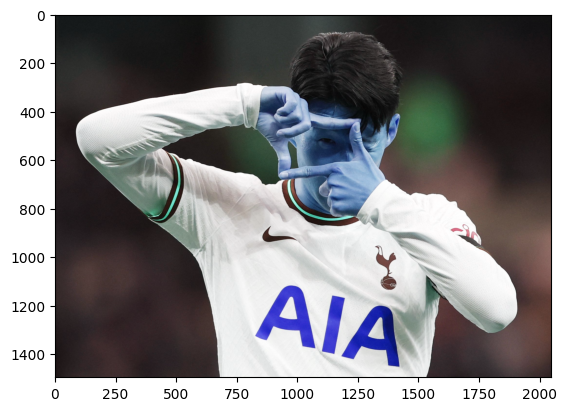

In [20]:
plt.imshow(img)
plt.show()

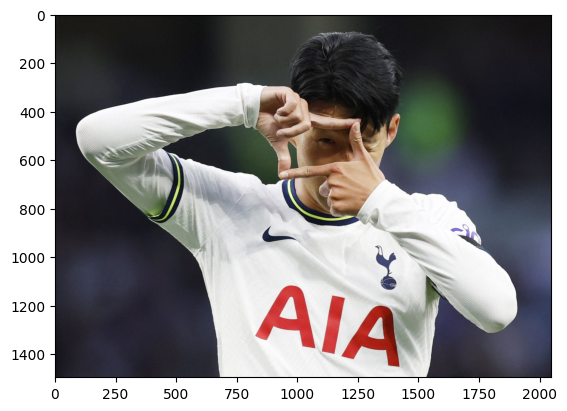

In [21]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

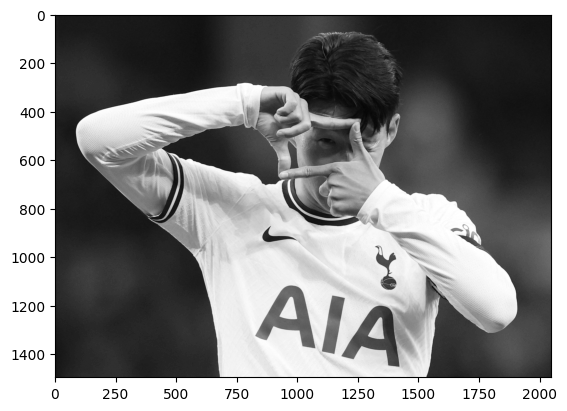

In [22]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

## Crop
* 얕은 복사 주의
* copy() 활용

In [23]:
img_rgb.shape

(1496, 2047, 3)

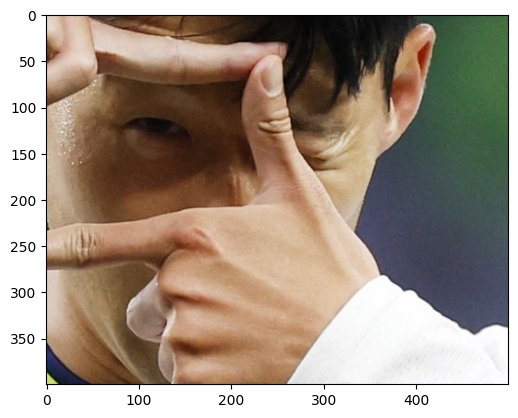

In [24]:
cropped_img = img_rgb[400:800, 1000:1500,:]
plt.imshow(cropped_img)
plt.show()

## Inversion

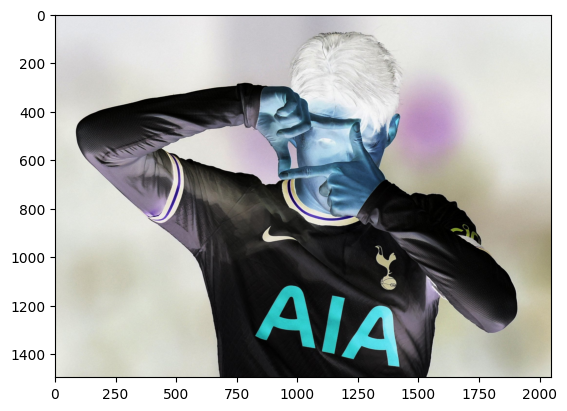

In [25]:
inversed_image = cv2.bitwise_not(img_rgb)
plt.imshow(inversed_image)
plt.show()

## Binarization

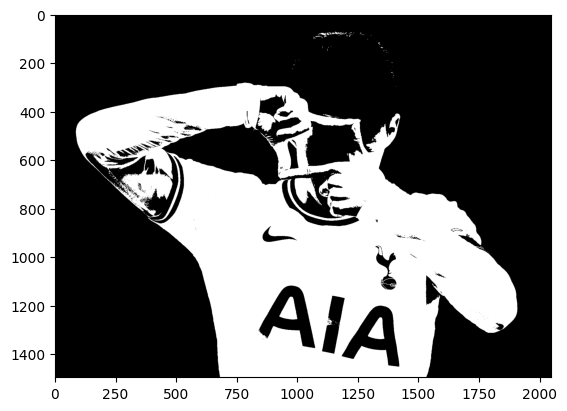

In [26]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
_, bin_img = cv2.threshold(img_gray, 122, 255, cv2.THRESH_BINARY)
plt.imshow(bin_img, cmap = 'gray')
plt.show()

## Blur

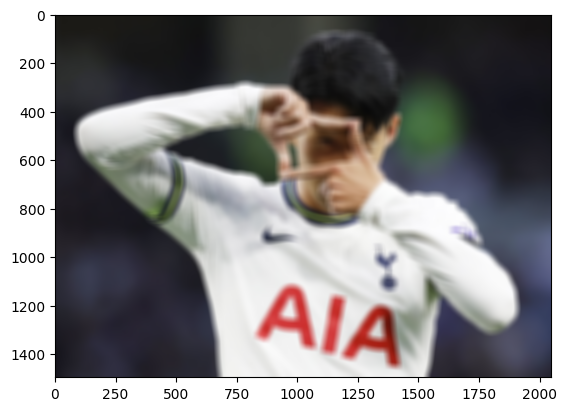

In [27]:
blur_img = cv2.blur(img_rgb, (32,32))
# (,) : 필터 사이즈 2의 제곱수일 때 해상도가 나누어 떨어진다.
plt.imshow(blur_img)
plt.show()

## Edge

### 방법 1 - Sobel

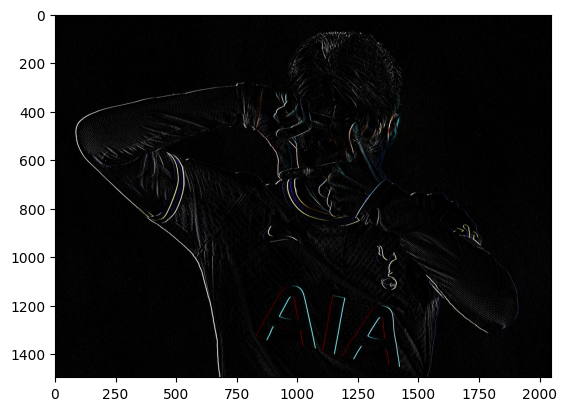

In [28]:
sobel_img = cv2.Sobel(img_rgb, cv2.CV_8U, 1, 0, 10)
# 1 : x미분, 0 : y미분, 10 : 커널 사이즈(최대 31, 홀수만 가능)
# 커널 사이즈가 클수록 가장자리를 잘 잡음
plt.imshow(sobel_img)
plt.show()

### 방법 2 - Laplacian

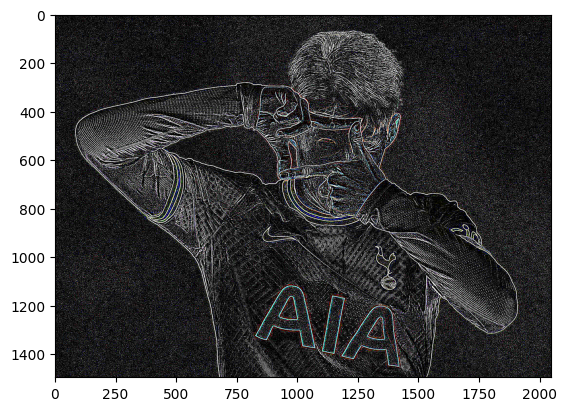

In [29]:
lapl_img = cv2.Laplacian(img_rgb, cv2.CV_8U, ksize = 5)
# 커널 사이즈는 Sobel과 동일한 논리로 값을 가짐
plt.imshow(lapl_img)
plt.show()

### 방법 3 - Canny
* Laplacian을 개선

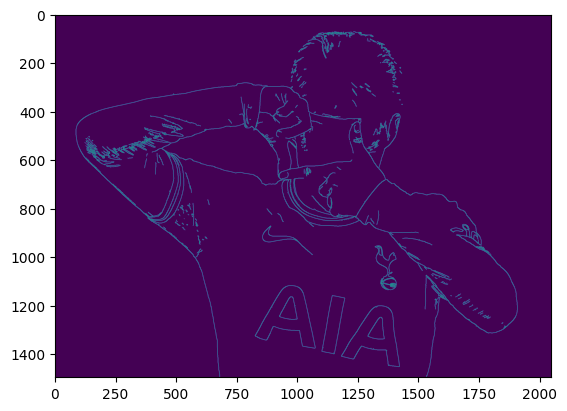

In [30]:
canny_img = cv2.Canny(img_rgb, 122, 255)
plt.imshow(canny_img)
plt.show()

## Color Detection

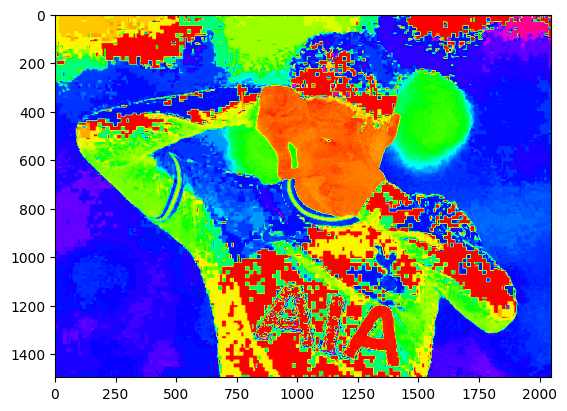

In [31]:
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img[:,:,0], cmap = 'hsv') # [:,:,0] : H
# 명도, 채도 빼고 색상만 검출
plt.show()

## Channel split

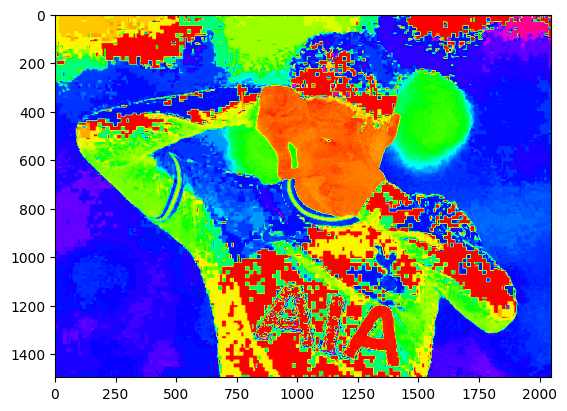

In [32]:
h, s, v = cv2.split(hsv_img)
plt.imshow(h, cmap = 'hsv')
plt.show()

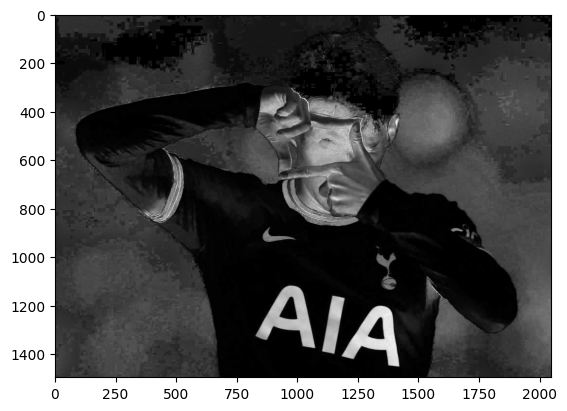

In [33]:
plt.imshow(s, cmap = 'gray')
plt.show()

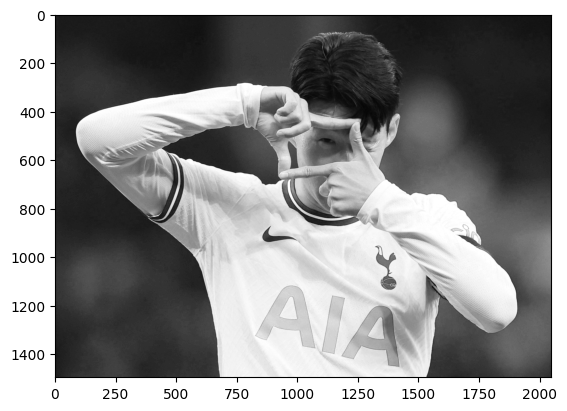

In [34]:
plt.imshow(v, cmap = 'gray')
plt.show()

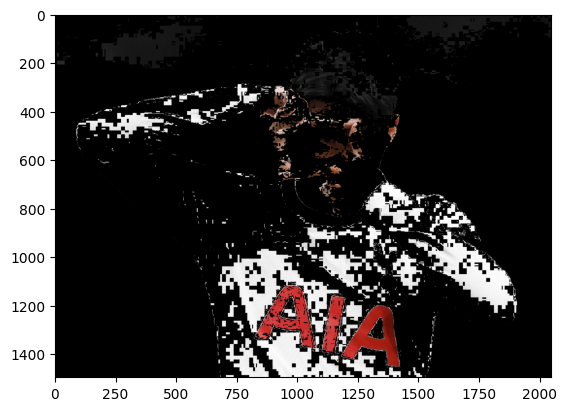

In [35]:
red_range = cv2.inRange(h, 0, 10)
red_img = cv2.bitwise_and(hsv_img, hsv_img, mask = red_range)
red_img_rgb = cv2.cvtColor(red_img, cv2.COLOR_HSV2RGB)
plt.imshow(red_img_rgb)
plt.show()

* 흰색에 빨간색이 살짝 반사되어 흰색도 검출되는 것
* 정확하게 원하는 색상만 검출하고 싶다면 범위를 정확하게 지정해야 한다.